In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
# Dummy Model Code

our_model = tf.keras.Sequential([tf.keras.layers.Input(shape=(64,)),
                                 tf.keras.layers.Dense(1)])

In [4]:
# Dummy Training Code

x_train = tf.random.normal((1024,64), dtype='float32')
y_train = tf.cast(tf.random.categorical(tf.math.log([[0.5, 0.5]]), 1024)[0], 'float32')

our_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy())

our_model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
16/16 [==============================] - 1s 4ms/step - loss: 6.1650
Epoch 2/5
16/16 [==============================] - 0s 6ms/step - loss: 6.1003
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 6.0698
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 6.0284
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 5.9805


In [5]:
import os
from PIL import Image
import numpy as np

# Set directory paths
real_data_dir = "/content/drive/MyDrive/Colab Notebooks/Group_Project_Data 2/Group_Project_Data 2 (1)/Group_Project_Data/Train/Real"
fake_data_dir = "/content/drive/MyDrive/Colab Notebooks/Group_Project_Data 2/Group_Project_Data 2 (1)/Group_Project_Data/Train/Fake"

# Load real images
real_images = []
if os.path.exists(real_data_dir):
    real_files = os.listdir(real_data_dir)
    if len(real_files) > 0:
        for file in real_files:
            if file.endswith(".jpg") or file.endswith(".png"):  # check if file is an image
                img_path = os.path.join(real_data_dir, file)
                try:
                    img = Image.open(img_path)
                    real_images.append(np.array(img))
                except:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {file}")
else:
    print(f"{real_data_dir} does not exist.")

# Load fake images
fake_images = []
if os.path.exists(fake_data_dir):
    fake_files = os.listdir(fake_data_dir)
    if len(fake_files) > 0:
        for file in fake_files:
            if file.endswith(".jpg") or file.endswith(".png"):  # check if file is an image
                img_path = os.path.join(fake_data_dir, file)
                try:
                    img = Image.open(img_path)
                    fake_images.append(np.array(img))
                except:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {file}")
else:
    print(f"{fake_data_dir} does not exist.")

# Concatenate real and fake images
images = np.concatenate((real_images, fake_images))

Skipping non-image file: .DS_Store
Skipping non-image file: .DS_Store


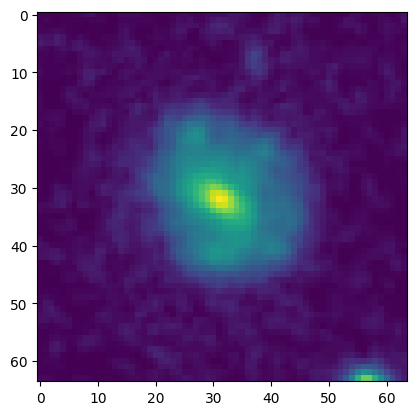

In [15]:
import matplotlib.pyplot as plt


# Display a random real image
plt.imshow(real_images[np.random.randint(0, len(real_images))])
plt.show()

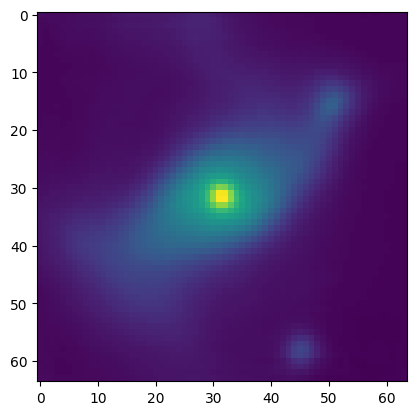

In [14]:
# Display a random fake image
plt.imshow(fake_images[np.random.randint(0, len(fake_images))])
plt.show()

In [8]:
# Split images into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, np.concatenate((np.ones(len(real_images)), np.zeros(len(fake_images)))), test_size=0.5, random_state=42)


In [9]:
import os
from PIL import Image
import numpy as np

# Set directory paths
real_data_dir = "/content/drive/MyDrive/Colab Notebooks/Group_Project_Data 2/Group_Project_Data 2 (1)/Group_Project_Data/Train/Real"
fake_data_dir = "/content/drive/MyDrive/Colab Notebooks/Group_Project_Data 2/Group_Project_Data 2 (1)/Group_Project_Data/Train/Fake"

# Load real images
real_images = []
if os.path.exists(real_data_dir):
    real_files = os.listdir(real_data_dir)
    if len(real_files) > 0:
        for file in real_files:
            if file.endswith(".jpg") or file.endswith(".png"):  # check if file is an image
                img_path = os.path.join(real_data_dir, file)
                try:
                    img = Image.open(img_path)
                    img = np.array(img)
                    img = np.expand_dims(img, axis=-1)  # add channel dimension
                    real_images.append(img)
                except:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {file}")
else:
    print(f"{real_data_dir} does not exist.")

# Load fake images
fake_images = []
if os.path.exists(fake_data_dir):
    fake_files = os.listdir(fake_data_dir)
    if len(fake_files) > 0:
        for file in fake_files:
            if file.endswith(".jpg") or file.endswith(".png"):  # check if file is an image
                img_path = os.path.join(fake_data_dir, file)
                try:
                    img = Image.open(img_path)
                    img = np.array(img)
                    img = np.expand_dims(img, axis=-1)  # add channel dimension
                    fake_images.append(img)
                except:
                    print(f"Error loading image: {img_path}")
            else:
                print(f"Skipping non-image file: {file}")
else:
    print(f"{fake_data_dir} does not exist.")

# Concatenate real and fake images
images = np.concatenate((real_images, fake_images))

# Split images into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, np.concatenate((np.ones(len(real_images)), np.zeros(len(fake_images)))), test_size=0.5, random_state=42)

# Create a simple convolutional neural network using Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Skipping non-image file: .DS_Store
Skipping non-image file: .DS_Store
Epoch 1/5
24/24 [==============================] - 12s 467ms/step - loss: 2.2811 - accuracy: 0.8319 - val_loss: 0.1291 - val_accuracy: 0.9780
Epoch 2/5
24/24 [==============================] - 11s 475ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0078 - val_accuracy: 0.9990
Epoch 3/5
24/24 [==============================] - 10s 410ms/step - loss: 0.0173 - accuracy: 0.9983 - val_loss: 0.0485 - val_accuracy: 0.9927
Epoch 4/5
24/24 [==============================] - 9s 371ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0230 - val_accuracy: 0.9970
Epoch 5/5
24/24 [==============================] - 11s 474ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0117 - val_accuracy: 0.9987


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy) # calculating test accuracy

94/94 [==============================] - 2s 21ms/step - loss: 0.0117 - accuracy: 0.9987
Test accuracy: 0.998668909072876


In [11]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary labels
y_pred_binary = np.round(y_pred)

# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

94/94 [==============================] - 2s 19ms/step
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [12]:
model.save('Group_X_Model_Trained.h5')

In [13]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model('Group_X_Model_Trained.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30753     
                                                                 
Total params: 31,073
Trainable params: 31,073
Non-trainable params: 0
_________________________________________________________________
